### Exploratory Data Analysis (EDA) 

In [57]:
# load required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [58]:
# load the cleansed dataset
file_path = "cleaned_dataset.csv"
df = pd.read_csv(file_path)

In [59]:
# display dataset information
print("Dataset Overview:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Organisation Name                              1689 non-null   object 
 1   Effective Date                                 1528 non-null   object 
 2   Property ID                                    1689 non-null   int64  
 3   Property Type                                  1689 non-null   object 
 4   Property Name                                  1689 non-null   object 
 5   Property Name/Address (Where no UPRN)          1657 non-null   object 
 6   Street Number                                  481 non-null    float64
 7   Street                                         1358 non-null   object 
 8   Town / Post Town                               1358 non-null   object 
 9   Postcode                          

#### 1. Data Visualization

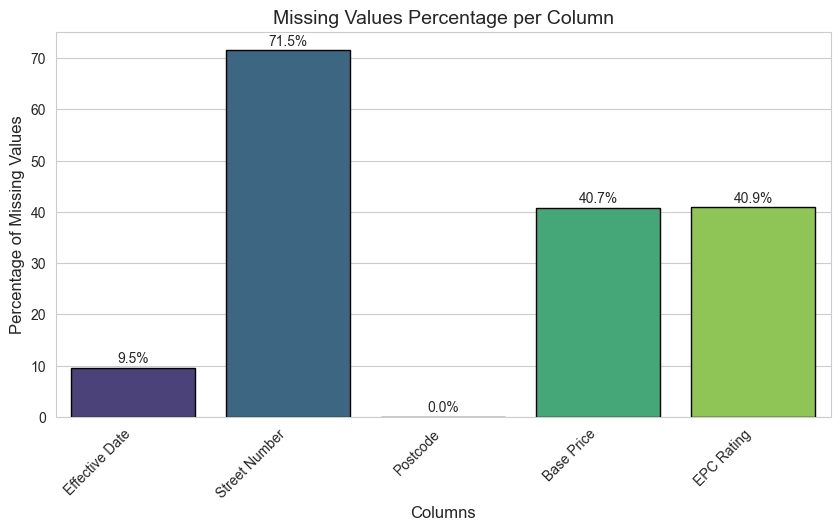

In [60]:
# Visualizing Missing Values for Selected Columns
selected_columns = ['Effective Date', 'Street Number', 'Postcode', 'Base Price', 'EPC Rating']

# Calculate the percentage of missing values per column
missing_percent = df[selected_columns].isnull().mean() * 100

# Convert to DataFrame for compatibility with seaborn
missing_df = missing_percent.reset_index()
missing_df.columns = ["Column", "Missing Percentage"]

# Set figure size and style
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Create bar plot
sns.barplot(x="Column", y="Missing Percentage", hue="Column", data=missing_df, palette="viridis", legend=False, edgecolor="black")

# add labels and title
plt.ylabel("Percentage of Missing Values", fontsize=12)
plt.xlabel("Columns", fontsize=12)
plt.title("Missing Values Percentage per Column", fontsize=14)
plt.xticks(rotation=45, ha="right")

# display percentages on bars
for index, row in missing_df.iterrows():
    plt.text(index, row["Missing Percentage"] + 1, f"{row['Missing Percentage']:.1f}%", ha='center', fontsize=10)

# display plot
plt.show()


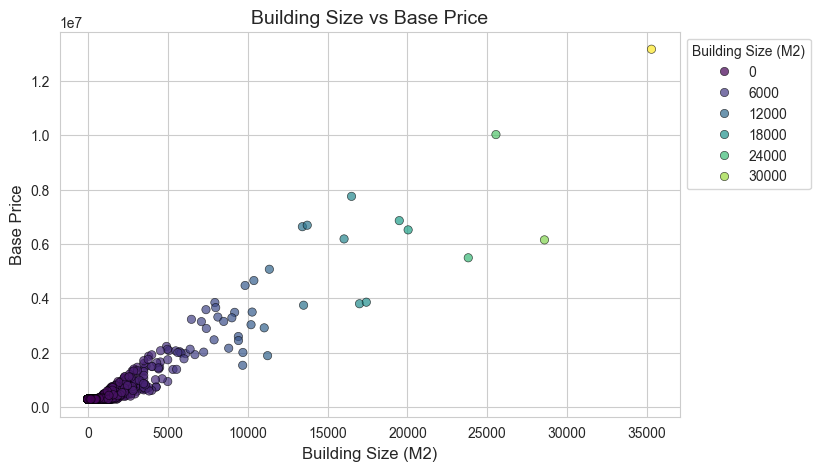

In [62]:
# Scatter Plot - Building Size vs Base Price

# Set figure size and style
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# create scatter plot
scatter = sns.scatterplot(x=df['Building Size - GIA (M2)'],
                          y=df['Base Price'],
                          hue=df['Building Size - GIA (M2)'], # adding color variation
                          palette="viridis",
                          edgecolor="black",
                          alpha=0.7)
# add labels and title 
plt.xlabel("Building Size (M2)", fontsize=12)
plt.ylabel("Base Price", fontsize=12)
plt.title("Building Size vs Base Price", fontsize=14)

# add legend
plt.legend(title="Building Size (M2)", loc="upper left", bbox_to_anchor=(1, 1))
# display plot
plt.show()

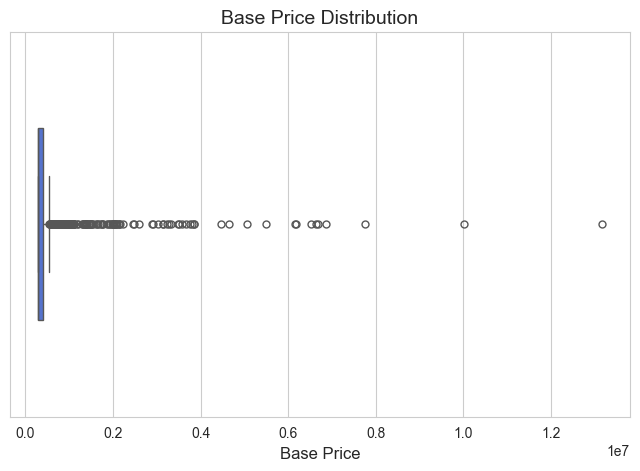

In [63]:
# box plot - Price Distribution

# set figure size and style
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# create box plot 
sns.boxplot(x=df['Base Price'], width=0.5, color="royalblue", flierprops={"marker": "o", "markersize": 5})

# add labels and title
plt.xlabel("Base Price", fontsize=12)
plt.title("Base Price Distribution", fontsize=14)

# display plot
plt.show()

#### 2. Correlation Analysis

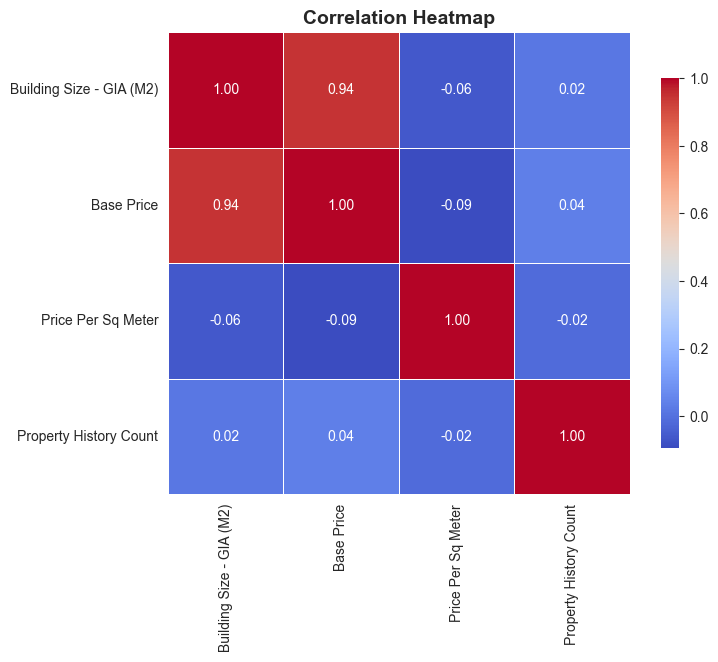

In [64]:
# correlation heatmap
# select numerical columns and compute correlation matrix
numerical_columns = ['Building Size - GIA (M2)', 'Base Price', 'Price Per Sq Meter', 'Property History Count']
correlation_matrix = df[numerical_columns].corr()

# set figure size and style
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f", # Limits decimal places for readability
    cmap="coolwarm",
    linewidths=0.5,
    square=True, # Ensures heatmap cells are square
    cbar_kws={"shrink": 0.8}, # adjust color bar size
    annot_kws={"size": 10} # controls annotation text size
)

# add title 
plt.title("Correlation Heatmap", fontsize=14, fontweight="bold")
# display plot
plt.show()

#### 3. Outlier Detection

In [65]:
# using z-score method for outlier detection

# compute absolute Z-scores for numerical columns (excluding NaN values)
z_scores = np.abs(zscore(df[numerical_columns], nan_policy='omit'))

# count the number of outliers (z-score > 3) per column
outliers = (z_scores > 3).sum(axis=0)

# convert to DataFrame for better formatting
outliers_df = pd.DataFrame({"Column": numerical_columns, "Outlier Count": outliers})

# display outliers in a readable format
print("Outliers detected in each numerical column:\n")
print(outliers_df.to_string(index=False))

Outliers detected in each numerical column:

                  Column  Outlier Count
Building Size - GIA (M2)             32
              Base Price             21
      Price Per Sq Meter             18
  Property History Count              2


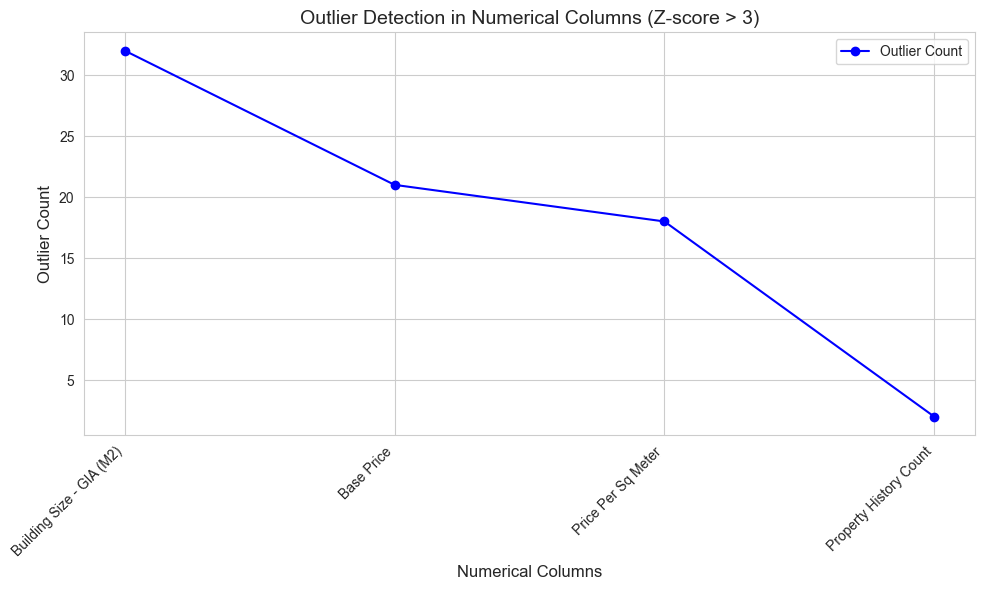

In [69]:
# display the plot the outliers on a line graph
plt.figure(figsize=(10, 6))
plt.plot(numerical_columns, outliers, marker='o', linestyle='-', color='b', label='Outlier Count')

# customize the plot
plt.title('Outlier Detection in Numerical Columns (Z-score > 3)', fontsize=14)
plt.xlabel('Numerical Columns', fontsize=12)
plt.ylabel('Outlier Count', fontsize=12)
plt.xticks(rotation=45, ha='right') # rotate x-axis labels for better readability
plt.legend()

# display the plot
plt.tight_layout()
plt.show()

#### 4. Cohort Analysis

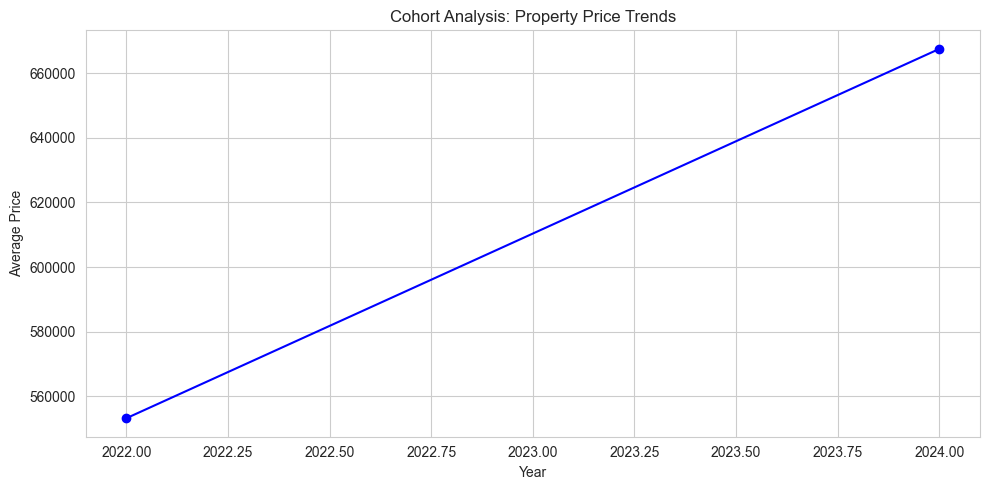

In [66]:
# Convert 'Date' to datetime and extract the year
df['Year'] = pd.to_datetime(df['Effective Date']).dt.year

# Group by 'Year' and calculate the mean of 'New Price'
grouped = df.groupby('Year')['Base Price'].mean()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(grouped.index, grouped.values, marker='o', linestyle='-', color='b')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Cohort Analysis: Property Price Trends')

# Adding grid and tightening layout
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()